In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [4]:
china = load_sample_image("china.jpg")

In [6]:
china.dtype

dtype('uint8')

In [8]:
china.shape

(427, 640, 3)

In [11]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [14]:
newimage = china.reshape((427 * 640, 3))
newimage.shape

(273280, 3)

In [12]:
import pandas as pd

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
# 颜色种类
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

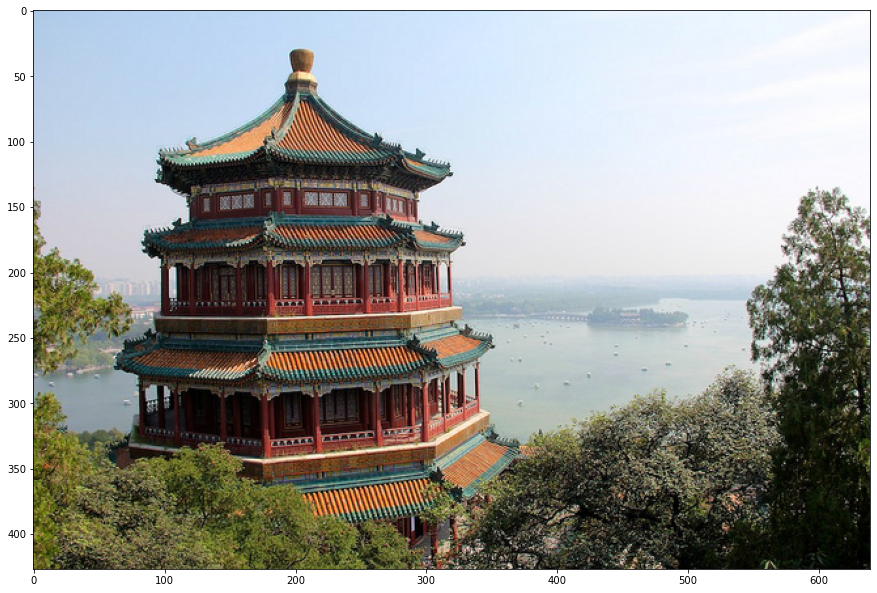

In [15]:
# 图片可视化
plt.figure(figsize=(15, 15))
plt.imshow(china) # imshow 只接受三维

图像现在有 9 万多种颜色
尝试用 kmeans 压缩到 64 种颜色(用 64 簇质心代替 9 万多种颜色)

画出随机压缩到64种颜色的矢量量化图像。

In [31]:
n_clusters = 64

# 三维二维

# 图像的预处理

# 归一化
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape) # 
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [32]:
type(china)

numpy.ndarray

In [33]:
# 转换为矩阵

image_array = np.reshape(china, (w * h, d))
image_array.shape

(273280, 3)

In [34]:
# 使用 1000 个数据找质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]

In [35]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)

In [36]:
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [37]:
labels = kmeans.predict(image_array)

In [38]:
labels.shape

(273280,)

In [39]:
image_kmeans = image_array.copy()

In [40]:
# 用质心替换样本

for i in range(w * h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [41]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [42]:
image_kmeans = image_kmeans.reshape(w, h, d)
image_kmeans.shape

(427, 640, 3)

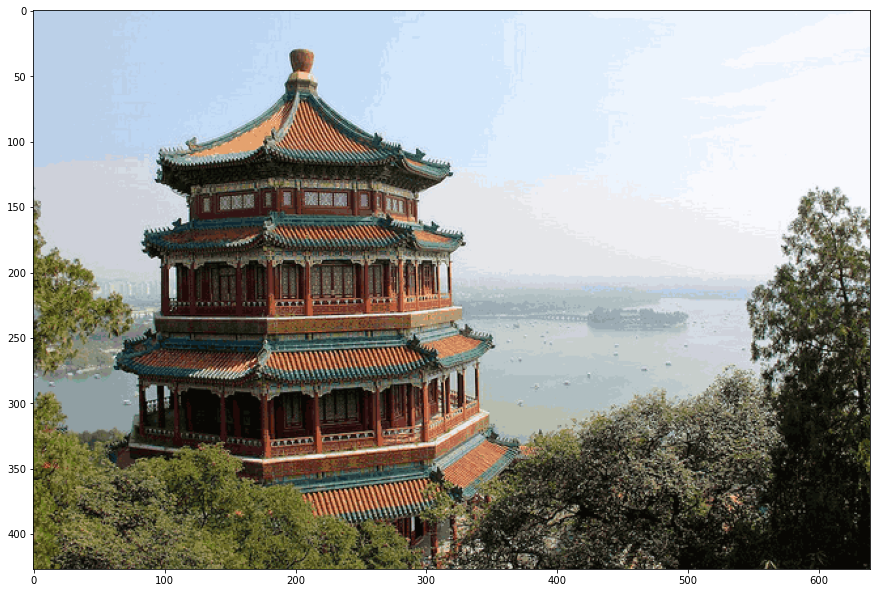

In [44]:
plt.figure(figsize=(15, 15))
plt.imshow(image_kmeans)

In [45]:
# 随机矢量量化，随机抽取质心

centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
# pairwise_distances_argmin(x1, x2, axis) 计算 x2 中每个样本到 x1 中每个样本的距离，并返回每个 x2 对应在 x1 中最近的样本的索引
labels_random = pairwise_distances_argmin(centroid_random, image_array, axis=0)


In [46]:
labels_random.shape

(273280,)

In [47]:
len(set(labels_random))

64

In [48]:
image_random = image_array.copy()

In [49]:
for i in range(w * h):
    image_random[i] = centroid_random[labels_random[i]]

In [51]:
image_random = image_random.reshape(w, h, d)

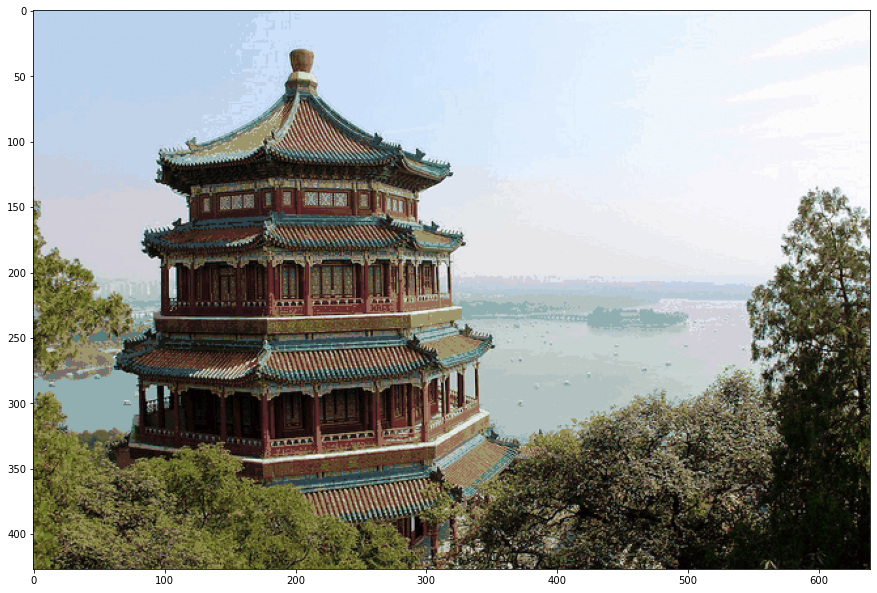

In [53]:
plt.figure(figsize=(15, 15))
plt.imshow(image_random)